# MAAI Bootcamp :: Evaluation of ML

# Introduction

Here, we cover how to quantitatively evaluate and optimise ML models. It is expected that, in the end, you:

- Get an overview of performance metrics with emphasis on classification. It includes:
    - Accuracy
    - Confusion Matrices
    - Precision, Recall, and F1 scores
    - ROC/AUC
- Get an overview of some optimisation techniques:
    - e.g. Grid Search and Random Search

The content follows the ML steps presented in the previous section:

1. Look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data for machine learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Launch, monitor, and maintain your system

>This session is based on chapter 3 of the book *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition 2022* by Aurélien Géron, and many code snippets, explanations and illustrations were used. Some changes were made to accommodate the subject within the MAAI bootcamp's timeframe. The book is a relevant source for a recap, and it is available in the [HvA Library](https://bib.hva.nl).

>Don't forget to create a new environment for day 2, as well as activating it, installing the required libraries using the `requirements.txt` file, and selecting it when using your IDE.

## 1. Look at the big picture

We are using the MNIST dataset, which contains 70K images of digits handwritten by high school students and employees of the US Census Bureau. It is a popular dataset, often called the "hello world" for ML. Since the objectives of this session are to recapitulate some concepts, it serves our purposes very well.

### Framing the problem

* This is a **supervised learning** task since the model can be trained with labeled examples (each instance comes with the expected output, i.e., the digit that the image represents).
* It is a **classification** task since the model will be asked to predict a category. More specifically, this is a multiclass classification problem, since the system will choose from multiple classes (the digits 0 through 9).
* It is also a **univariate classification problem** since we only try to predict a single class label for each image. If we were trying to predict multiple labels per image (e.g., if each image could contain multiple digits or if we had additional tasks like predicting the stroke thickness), it would be a multilabel classification or a multitask classification problem.

### Selecting a performance measure

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a lot of time on this topic.


## 2. Get the data

We are using the Scikit-learn function to fetch the MNIST dataset. 

### Download the data

In [44]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

## 3. Explore and visualize the data to gain insights


### Take a Quick Look at the Data Structure

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

* The variable X has the pixel values
* The variable y has the label (digits from 0 to 9)

In [45]:
X, y = mnist.data, mnist.target

def pretty_print(image):
    image_2d = image.reshape((28, 28))
    for row in image_2d:
        print(" ".join(f"{pixel:3}" for pixel in row))

pretty_print(X[0])

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0 

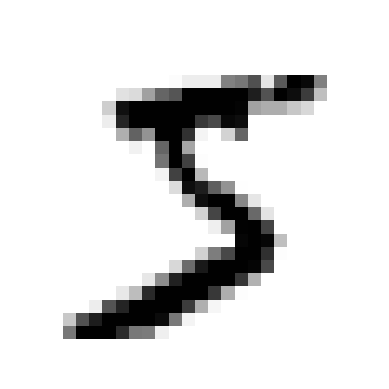

In [46]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

It looks like a 5. Let's check the label.

In [47]:
print(f'Yes, the label is {y[0]}')

Yes, the label is 5


### Showing more digits

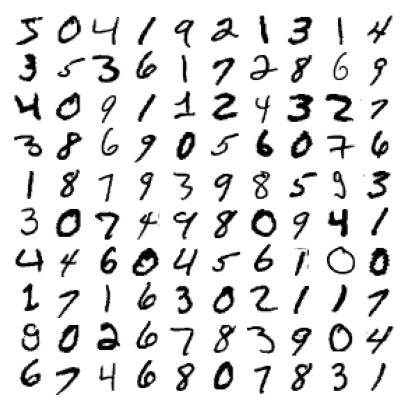

In [48]:
plt.figure(figsize=(5, 5))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## 4. Prepare the data for machine learning algorithms

The dataset do not require much preparation because features are the pixels itself. Thus, no transformation required for now.

But we should always create a test set and set it aside before inspecting the data closely. The MNIST dataset returned by fetch_openml() is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images).

In [49]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 5. Select a model and train it

### Training a Binary Classifier

Let’s simplify the problem and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and non-5. First we’ll create the target vectors for this classification task:

In [50]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

Now let’s pick a classifier and train it. A good place to start is with a stochastic gradient descent (SGD, or stochastic GD) classifier, using Scikit-Learn’s SGDClassifier class. 

In [51]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [52]:
sgd_clf.predict([X[0]])

array([ True])

### Measuring Accuracy using Cross-Validation

The accuracy of a classification model is given by the formula:

$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} 
$

A good way to evaluate a model is to use cross-validation, just as we did in the previous section. Let’s use the cross_val_score() function to evaluate our SGDClassifier model, using k-fold cross-validation with three folds. 

In [53]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print(f'mean: {score.mean()}')
print(f'all scores: {score}')

mean: 0.9570333333333334
all scores: [0.95035 0.96035 0.9604 ]


It looks a great accuracy of above 95% for all cross-validation folds? 

Well, before you get too excited, let’s look at a dummy classifier that just classifies every single image in the most frequent class, which in this case is the negative class (i.e., non 5):

In [54]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)


,strategy,'prior'
,random_state,None
,constant,None


In [55]:
score = cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print(f'mean: {score.mean()}')
print(f'all scores: {score}')

mean: 0.90965
all scores: [0.90965 0.90965 0.90965]


That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others). A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM).

### Confusion Matrix

A **confusion matrix** is a table used to evaluate the performance of a classification algorithm. It compares the predicted labels against the actual labels. 

For a binary classification problem, the confusion matrix can be seen as follows:

|                         | **Predicted: Negative (Not 5)** | **Predicted: Positive (is 5)** |
|-------------------------|---------------------------------|-----------------------------|
| **Actual: Negative (Not 5)** | True Negative (TN)              | False Positive (FP)         |
| **Actual: Positive (is 5)**    | False Negative (FN)             | True Positive (TP)          |

#### Definitions

- **True Negative (TN)**: The number of instances where the model correctly predicted `Negative` (not 5) when the actual label was also `Negative` (not 5).
- **False Positive (FP)**: The number of instances where the model incorrectly predicted `Positive` (5) when the actual label was `Negative` (not 5).
- **False Negative (FN)**: The number of instances where the model incorrectly predicted `Negative` (not 5) when the actual label was `Positive` (5).
- **True Positive (TP)**: The number of instances where the model correctly predicted `Positive` (5) when the actual label was also `Positive` (5).

In [56]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

The illustration bellow shows a confusion matrix with examples:

![Illustrated Confusion Matrix](support/images/mls3_0303.png)
<br><sub><sup>Figure: An illustrated confusion matrix showing examples of true negatives (top left), false positives (top right), false negatives (lower left), and true positives (lower right) - Source: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow<sub><sup>
<br>

In this example, we have the following values:
* TN (True negatives): 5 cases
* TP (True positives): 3 cases
* FP (False positives): 1 case
* FN (False negatives): 2 cases

By examining these values, you can compute various performance metrics such as accuracy, precision, recall, and F1 score.

### Precision, Recall and F1

Precision measures how many of the predicted positive instances are actually positive. It assesses the quality of the positive predictions made by the model.

It is given by the formula:

$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$

Where:
- **TP** = True Positives
- **FP** = False Positives

Let's see what is the precision of our model:

In [58]:
from sklearn.metrics import precision_score, recall_score

print(f'precision: {precision_score(y_train_5, y_train_pred):.3f}')

precision: 0.837


> A trivial way to have perfect precision is to create a classifier that always makes negative predictions, except for one single positive prediction on the instance it’s most confident about. If this one prediction is correct, then the classifier has 100% precision (precision = 1/1 = 100%). Obviously, such a classifier would not be very useful, since it would ignore all but one positive instance. So, precision is typically used along with another metric named recall

Recall, also called sensitivity or the true positive rate (TPR), measures how many of the actual positive instances were correctly identified by the model. In other words, it assesses how well the model finds all the relevant positive cases.

The recall of a classification model is given by the formula:

$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$

Where:
- **TP** = True Positives
- **FN** = False Negatives

Let's see what is the recall of our model:

In [59]:
print(f'recall: {recall_score(y_train_5, y_train_pred):.3f}')


recall: 0.651


Now, the 5-detector does not look as shiny as it did when we looked at its accuracy. When it claims an image represents a 5, it is correct only 83.7% of the time. Moreover, it only detects 65.1% of the 5s.

It is often convenient to combine precision and recall into a single metric called the $F_1$ score, especially when you need a single metric to compare two classifiers. The $F_1$ score is the harmonic mean of precision and recall (Equation 3-3). Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high $F_1$ score if both recall and precision are high.

The $F_1$ score is calculated using the following formula:

$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$

Let's see what is the $F_1$ score of our model:

In [60]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Exercise: Precision and recall in action

Humans are under attack! Aliens have unleashed a dangerous chemical weapon — a virus capable of decimating humanity. The Global Health Organisation has urged its top ML/DL team to build a classifier that detects whether someone is infected. They are very excited and disclosed the model's performance to the society: 80% of accuracy.

Your mission: analyse the performance of this classifier using Precision and Recall.
We’ll give you the ground-truth results of the model. You must calculate how well it did at identifying infected individuals.

Scenario:

Out of a group of 10 million tested humans, the classifier produced the following results:

- True Negatives (TN): 7 million
- True Positives (TP): 1 millioin
- False Positives (FP): 0
- False Negatives (FN): 2 million

Tasks
- Build the confusion matrix
- Compute Precision.
- Compute Recall.
- Interpret the results in the story context — what does this mean for humanity’s survival?


### The Precision/Recall Trade-off

Probabilistic models, such as *SGDClassifier*`*, make decisions based on probability scores. Each instance is assigned a score, and if this score exceeds a threshold, the instance is classified as positive; otherwise, it's classified as negative.

The figure below shows a few digits positioned from the lowest score on the left to the highest score on the right. 

Some observations:
- The threshould in the middle computes a precision of 80% and a recall of 67%
- Higher thresholds increase precision but reduces recall
- Lower thresholds increase recall in detriment to precision

![The precision/recall tradeoff](support/images/mls3_0304.png)
<br><sub><sup>Figure: The precision/recall trade-off: images are ranked by their classifier score, and those above the chosen decision threshold are considered positive; the higher the threshold, the lower the recall, but (in general) the higher the precision - Source: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow<sub><sup>
<br>

We can get the thresholds by calling the *decision_function*.


In [61]:
# getting probability estimates for on specific example
y_scores = sgd_clf.decision_function([X[0]])
y_scores

array([2164.22030239])

The SGDClassifier uses a threshold equal to 0, so the preceding code returns the same result as the predict() method (i.e., True)

In [62]:
# with a threshold of 0

threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([ True])

Let’s raise the threshold

In [63]:
# with a higher threshold
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 3,000.

How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [64]:
## cross val predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [65]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds (the function adds a last precision of 0 and a last recall of 1, corresponding to an infinite threshold):

In [66]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finally, use Matplotlib to plot precision and recall as functions of the threshold value. Let’s show the threshold of 3,000 we selected

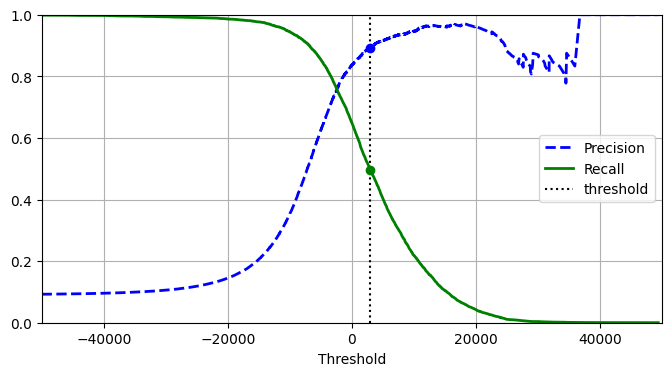

In [67]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

At this threshold value, precision is near 90% and recall is around 50%.

### ROC Curves

ROC (Receiver Operating Characteristic) curves are used to evaluate the performance of binary classification models. They plot the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

#### Key Terms

- True Positive Rate (TPR): The proportion of actual positives that are correctly identified. Also called recall.
  
  $
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $

- **False Positive Rate (FPR):** The proportion of actual negatives that are incorrectly identified as positives.
  
  $
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $

#### Plotting the ROC Curve

1. **Calculate TPR and FPR:** For various threshold values, compute TPR and FPR.
2. **Plot TPR vs. FPR:** Create a plot with FPR on the x-axis and TPR on the y-axis.

#### Interpreting the ROC Curve

- **Diagonal Line:** The diagonal line from (0,0) to (1,1) represents random guessing. A model's performance is compared against this line.
- **Area Under the Curve (AUC):** AUC quantifies the overall ability of the model to discriminate between positive and negative cases. An AUC of 1 indicates perfect classification, while an AUC of 0.5 indicates no discrimination (random guessing).

In [68]:
from sklearn.metrics import roc_curve

sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(y_train_5, y_scores)


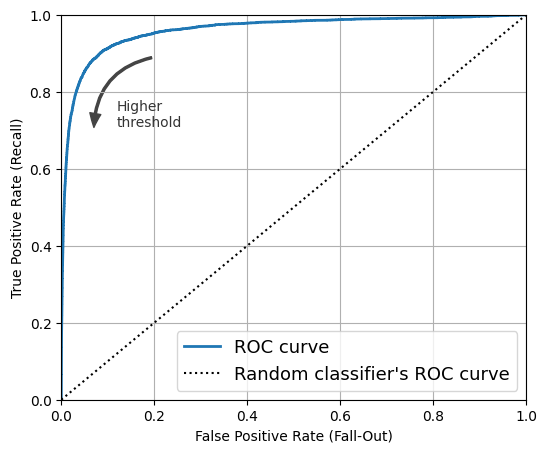

In [69]:
import matplotlib.patches as patches  # extra code – for the curved arrow


plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(sgd_fpr, sgd_tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to estimate the ROC AUC:



In [70]:
from sklearn.metrics import roc_auc_score

sgd_roc_auc = roc_auc_score(y_train_5, y_scores)

### Useful for comparison

In [71]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Train the RandomForest model
forest_cf = RandomForestClassifier(random_state=42, n_estimators=5)

y_probas_forest = cross_val_predict(forest_cf, X_train, y_train_5, cv=3,method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_train_5, y_scores_forest)
rf_roc_auc = roc_auc_score(y_train_5, y_scores_forest)


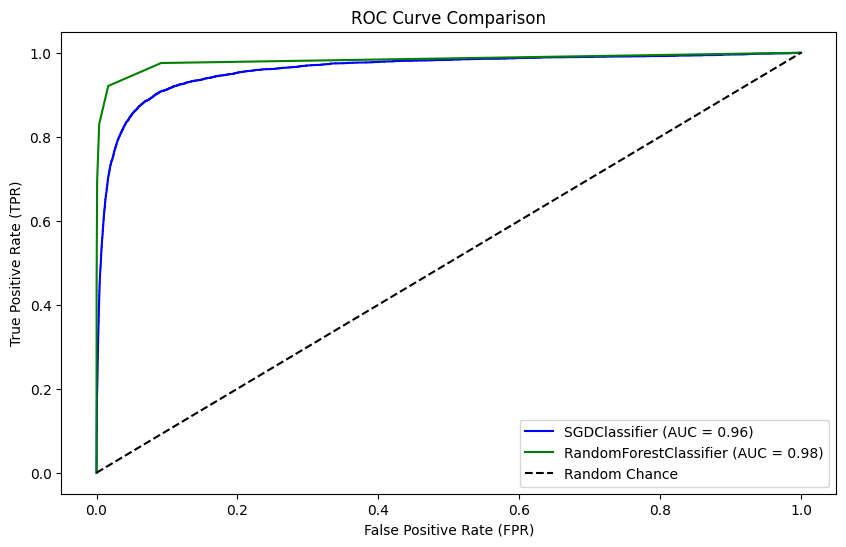

In [72]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Assuming y_train_5 and y_scores for SGDClassifier, and rf_fpr, rf_tpr for RandomForestClassifier are already calculated

# Plotting the ROC curves for both models
plt.figure(figsize=(10, 6))

# Plotting ROC curve for SGDClassifier
plt.plot(sgd_fpr, sgd_tpr, label=f"SGDClassifier (AUC = {sgd_roc_auc:.2f})", color='blue')

# Plotting ROC curve for RandomForestClassifier
plt.plot(rf_fpr, rf_tpr, label=f"RandomForestClassifier (AUC = {rf_roc_auc:.2f})", color='green')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")

# Titles and labels
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

# Show plot
plt.show()


<hr>

## 6. Fine-tune your model

Hyperparameter optimization is a crucial step in the machine learning pipeline that involves finding the best settings for a model to achieve the highest performance. This process is essential for improving model accuracy, generalization, and efficiency.

### Importance of Optimization

1. **Improves Model Performance**: Properly tuned hyperparameters can significantly enhance the model's ability to make accurate predictions.
2. **Prevents Overfitting/Underfitting**: Optimization helps in finding the right balance, preventing the model from being too complex or too simple.
3. **Increases Efficiency**: Efficient hyperparameter tuning can reduce training time and computational resources by focusing on the most promising settings.

### Grid Search

**Grid Search** is a traditional and exhaustive method for hyperparameter optimization:

1. **Define Parameter Grid**: Specify a grid of hyperparameter values to search over.
2. **Cross-Validation**: Evaluate the model's performance using cross-validation for each parameter combination.
3. **Select Best Model**: Choose the combination with the best performance metric (e.g., F1 score, accuracy).

The following snippet code is an example of usage of grid search



In [73]:
# Import necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

#, cross_val_score
from sklearn.metrics import classification_report
#, confusion_matrix, f1_score
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split

# Define the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'loss': ['hinge', 'log_loss'],
    'max_iter': [2000, 3000]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=3, 
                           scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_5)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1 score:", grid_search.best_score_)

# Predict on the training set (using cross-validation)
y_train_pred = grid_search.predict(X_train)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train_5, y_train_pred)
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print("\nOverall performance on the CV training set: ")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'loss': 'log_loss', 'max_iter': 2000}
Best cross-validation F1 score: 0.7917284086858638

Overall performance on the CV training set: 
Accuracy: 0.9623
Precision: 0.9415711490075482
Recall: 0.6212875853163623
F1: 0.7486108024005335


### Testing the optimal model on test data

In [76]:
# Evaluate on test set
best_sgd_clf = grid_search.best_estimator_
y_pred = best_sgd_clf.predict(X_test)

print("Confusion matrix on test set:")
print(confusion_matrix(y_test_5, y_pred))

# Calculate and print precision  on the test set
prec_test = precision_score(y_test_5, y_pred)
print(f"\nPrecision on test set: {prec_test:.4f}")

# Calculate and print recall  on the test set
rec_test = recall_score(y_test_5, y_pred)
print(f"Recall on test set: {rec_test:.4f}")

# Calculate and print F1 score on the test set
f1_test = f1_score(y_test_5, y_pred)
print(f"F1 score on test set: {f1_test:.4f}")


Confusion matrix on test set:
[[9061   47]
 [ 316  576]]

Precision on test set: 0.9246
Recall on test set: 0.6457
F1 score on test set: 0.7604


## 7. Present your solution

Here, results are shared with key stakeholders

## 8. Launch, monitor, and maintain your system

Here, your model is embedded into an application, which is used by end-users and constantly monitored. 

# A summary, with a note on multiclass problems

In today's tutorial, we focused on classification metrics such as precision, recall, F1 score, and confusion matrices, primarily within the context of binary classification problems. However, these concepts are not limited to binary classification; they can also be applied to multiclass problems, where there are more than two classes to predict.

#### Precision and Recall in Multiclass Classification

- **Precision:** In a multiclass setting, precision can be computed for each class individually. Precision measures how many of the instances classified as a particular class are truly from that class. For each class, precision is calculated as:

  $
  \text{Precision}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Positives}_i}
  $

  For multiclass problems, precision can be averaged in the following ways:
  - **Macro-Averaged Precision:** Calculate precision for each class independently and then take the average. This treats all classes equally regardless of their frequency.
  - **Micro-Averaged Precision:** Aggregate the contributions of all classes to compute the average precision. This method considers the global counts of true positives, false positives, and false negatives.
  - **Weighted-Averaged Precision:** Compute the precision for each class and then average them, weighted by the number of true instances for each class. This accounts for class imbalance.

- **Recall:** Similarly, recall can be computed for each class, reflecting how many of the instances of a particular class were correctly identified. For each class, recall is given by:

  $
  \text{Recall}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Negatives}_i}
  $

  For multiclass problems, recall can be averaged in these ways:
  - **Macro-Averaged Recall:** Calculate recall for each class independently and then take the average. This method treats all classes equally.
  - **Micro-Averaged Recall:** Aggregate the contributions of all classes to compute the average recall. This method combines the true positives, false negatives, and false positives across all classes.
  - **Weighted-Averaged Recall:** Compute the recall for each class and then average them, weighted by the number of true instances for each class. This approach takes into account the class distribution.

#### F1 Score in Multiclass Classification

The F1 score is the harmonic mean of precision and recall. For multiclass problems, it can be calculated similarly to precision and recall:
- **Macro-Averaged F1 Score:** Compute the F1 score for each class independently and then take the average. This treats all classes equally.
- **Micro-Averaged F1 Score:** Aggregate the contributions of all classes to compute the average F1 score, considering the global counts of true positives, false negatives, and false positives.
- **Weighted-Averaged F1 Score:** Compute the F1 score for each class and then average them, weighted by the number of true instances for each class.

#### ROC Curve and AUC in Multiclass Classification

- **ROC Curve:** The ROC curve, which plots the true positive rate (recall) against the false positive rate at various threshold settings, is typically used for binary classification. For multiclass classification, the ROC curve can be extended to handle multiple classes. This is done by:
  - **One-vs-Rest (OvR) ROC Curves:** Creating an ROC curve for each class by treating that class as the positive class and all other classes as negative.
  - **Micro-Averaged ROC Curve:** Aggregating contributions of all classes to compute a single ROC curve, reflecting the overall performance across all classes.

- **AUC (Area Under the ROC Curve):** AUC measures the area under the ROC curve and provides a single value to summarize the model's performance. For multiclass problems, AUC can be computed as:
  - **Macro-Averaged AUC:** Compute AUC for each class independently and then average. This treats all classes equally.
  - **Micro-Averaged AUC:** Aggregate the contributions of all classes to compute a single AUC score, reflecting the overall performance.

#### Confusion Matrix in Multiclass Classification

In multiclass classification, the confusion matrix is extended to a matrix where rows represent the true classes and columns represent the predicted classes. Each cell \((i, j)\) in the matrix represents the number of instances of class \(i\) that were predicted as class \(j\). This provides a comprehensive view of how predictions are distributed across different classes.

## Conclusion

Understanding these metrics in the context of multiclass classification allows for more nuanced evaluation of model performance, especially in datasets where classes have varying frequencies and relationships. We will delve deeper into these concepts and their applications in multiclass settings in future sessions. Stay tuned!
